In [2]:
#import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%matplotlib inline 
# The above line is ONLY FOR JUPYTER NOTEBOOK - So that matplotlib works properly
sns.set() #for appearence 

In [4]:
import sklearn

In [5]:
data=pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


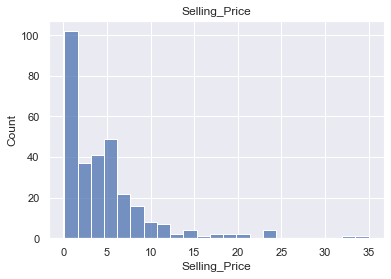

In [6]:
sns.histplot(data['Selling_Price'])
plt.title('Selling_Price')
plt.show()
#here our distribution is not normal so for linear regression we are converting into normal distribution

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


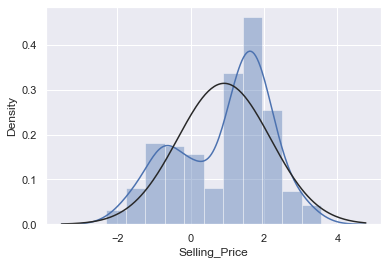

In [7]:
#for normal distribution we are using log function log(a) , we can use log(1+a) too.
from scipy.stats import norm # To plot the perfect normal distribution line
sns.distplot(np.log(data['Selling_Price']), fit=norm)
plt.show()

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


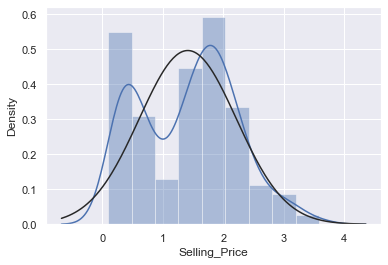

In [8]:
sns.distplot(np.log1p(data['Selling_Price']), fit=norm)
plt.show()

The first graph looks closer to normal than the second one.  
So we will apply the log function to `Selling_Price`, and then predict the log of selling price.  
  
To make the final predictions, we will apply the exponential function to our predictions (which are actually log of selling price) to get the actual selling price. 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data=data.drop(['Car_Name'],axis=1)
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [12]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [13]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [14]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## Checking the null values

In Python, the value of `True` is 1 and value of `False` is 0. `isnull()` returns a dataframe of booleans (True/False values) where `True` means there is a value missing in that cell. If we add all the boolean values in 1 column, we will get the number of `True` values in that column, which is the same as the number of missing values in that column.

In [15]:
data.isnull()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

we have no null values just take another data which have some null values

In [17]:
Data=pd.read_csv('car data modified.csv')
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988.0,Diesel,Dealer,Manual,0.0
297,brio,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0.0
298,city,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0.0
299,city,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0.0


In [18]:
Data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       1
Fuel_Type        0
Seller_Type      1
Transmission     0
Owner            1
dtype: int64

## Taking Care of Missing Values
We can either drop (delete) the rows/data points that have missing values, OR we can fill the missing values.  
In this case, we will fill them.

for owner and Seller Type we will use most frequent value and for Kms driven we will use avrage value .  

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
Data[['Seller_Type', 'Owner']] = imputer.fit_transform(Data[['Seller_Type', 'Owner']])

In [20]:
imputer = SimpleImputer(strategy='median')
Data[['Kms_Driven']] = imputer.fit_transform(Data[['Kms_Driven']])

In [21]:
Data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

##Transforming Variables

Before mapping correlations, we need to transform our target variable to bring it as close to the normal distribution as possible.

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


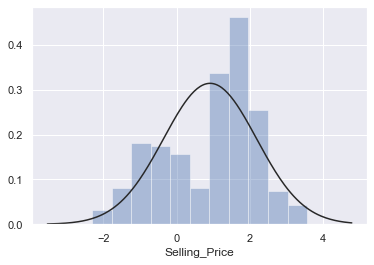

In [22]:
data['Selling_Price'] = np.log(data['Selling_Price'])
sns.distplot(data['Selling_Price'], fit=norm, kde=False)
plt.show()

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


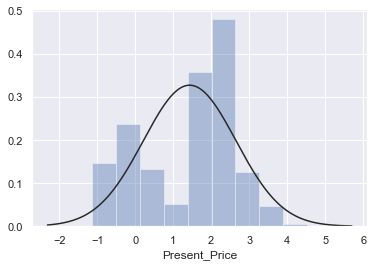

In [23]:
data['Present_Price'] = np.log(data['Present_Price'])
sns.distplot(data['Present_Price'], fit=norm, kde=False)
plt.show()

## correalation

it is from -1 to 1

In [24]:
corr=data.corr()
corr['Selling_Price']

Year             0.272282
Selling_Price    1.000000
Present_Price    0.949679
Kms_Driven       0.000472
Owner           -0.117410
Name: Selling_Price, dtype: float64

In [25]:
(corr["Selling_Price"]).sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.949679
Year             0.272282
Kms_Driven       0.000472
Owner           -0.117410
Name: Selling_Price, dtype: float64

### Plotting for Each Feature
In a lot of datasets there will be too many features to check each of them. But since we have very few features, we can. 

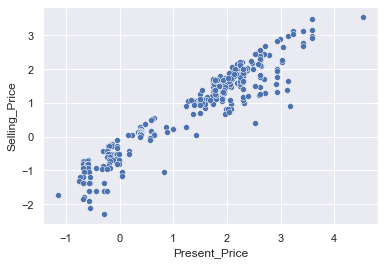

In [26]:
sns.scatterplot(x=data['Present_Price'], y=data['Selling_Price'])
plt.show()

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


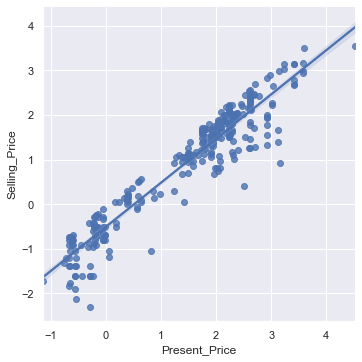

In [27]:
sns.lmplot('Present_Price','Selling_Price',data=data)
plt.show()

#we are ploting log of kms driven to make it linear

c:\users\len\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


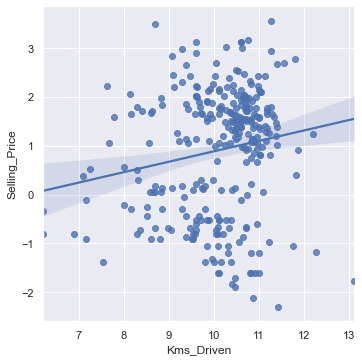

In [28]:
data['Kms_Driven'] = np.log(data['Kms_Driven'])
sns.lmplot('Kms_Driven','Selling_Price',data=data)
plt.show()

In [30]:
corr_matrix = data.corr()
(corr_matrix["Selling_Price"])
(corr_matrix["Selling_Price"]).sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.949679
Year             0.272282
Kms_Driven       0.170268
Owner           -0.117410
Name: Selling_Price, dtype: float64

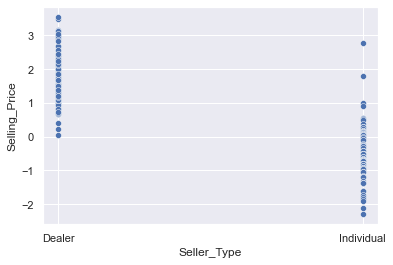

In [37]:
sns.scatterplot(x=data['Seller_Type'], y=data['Selling_Price'])
plt.show()

##outliers

In the above graph, a different dataset has been used where we would've had to predict house prices instead of car prices. We have plotted the sale price of many houses vs the area occupied by them. The house price obviously increases with increase in area.  
<br>
If you look at the isolated points at the bottom left, you can see that even though they have really high area their price is really low. They do not follow the trend AT ALL. So they are called outliers.  
<br>
If we do not remove outliers, our model would get the wrong idea about the data and thus accuracy would go down. So it is best to remove those points.

![image.png](attachment:image.png)

here are some outliers...

The points lying at the top of Individual may be outliers.
Now we can remove all of these points but it would be messing with our data too much, and we only have 300 cars. If we remove the top one in 'Individual' though, we will have a much better linear relationship.

But while removing points we need to be careful. Are we removing them because they are really outliers, or is it just because we want our model to fit better?

In our case, it is possible that an Individual sold a really high-value car. But it is also possible that the individual just scammed, or got lucky, or the data is wrongly obtained or entered, which all are characteristics of an outlier. Let us see what is really the case:

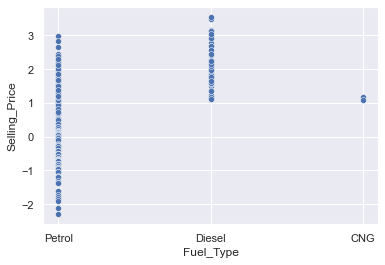

In [39]:
sns.scatterplot(x=data['Fuel_Type'], y=data['Selling_Price'])
plt.show()

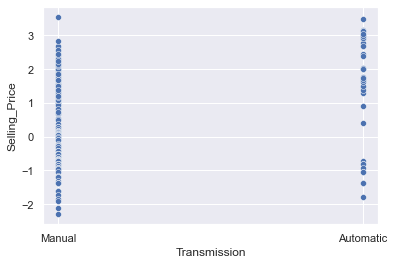

In [40]:
sns.scatterplot(x=data['Transmission'], y=data['Selling_Price'])
plt.show()

In [41]:
data[(data['Seller_Type'] == 'Individual') & (data['Selling_Price'] > 2)]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
53,2013,2.772589,3.421327,11.81303,Diesel,Individual,Automatic,0


This car has all the characteristics of an expensive car. The fuel type is diesel, transmission is automatic. If you plot the boxplot of `Fuel_Type` and `Transmission`, you will find that Diesel and Automatic cars are more expensive.  
Also `Kms_Driven` is very high. And the selling price increases with `Kms_Driven`.
<br>
Thus, our point is not really an outlier. 

BUT if we wanted to remove it, the code would be `dataset.drop([53], axis=0)`, since we're removing the **row** (therefore axis=0) with index 53.

In [ ]:
## Encoding Categorical Variables

In [42]:
data=pd.get_dummies(data)

In [43]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,1.208960,1.720979,10.203592,0,0,0,1,1,0,0,1
1,2013,1.558145,2.255493,10.668955,0,0,1,0,1,0,0,1
2,2017,1.981001,2.287471,8.839277,0,0,0,1,1,0,0,1
3,2011,1.047319,1.423108,8.556414,0,0,0,1,1,0,0,1
4,2014,1.526056,1.927164,10.656082,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,2.251292,2.451005,10.433763,0,0,1,0,1,0,0,1
297,2015,1.386294,1.774952,11.002100,0,0,0,1,1,0,0,1
298,2009,1.208960,2.397895,11.384342,0,0,0,1,1,0,0,1
299,2017,2.442347,2.525729,9.104980,0,0,1,0,1,0,0,1


In [44]:
data=data.drop(['Fuel_Type_CNG', 'Seller_Type_Dealer', 'Transmission_Automatic'],axis=1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train, test = train_test_split(data, test_size=0.25, random_state=0)

In [48]:
y_train = train['Selling_Price']
y_test = test['Selling_Price']
X_train = train.drop(['Selling_Price'], axis=1)
X_test = test.drop(['Selling_Price'], axis=1)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((225, 8), (225,), (76, 8), (76,))

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

pred = np.exp(model.predict(X_test))
#to get actual value we are takking exponential of output

In [51]:
from sklearn.metrics import r2_score

r2_score(np.exp(y_test), pred)

0.977031276299252